### Ultralytics Yolo v3 설치

CDS 폴더명 수정 : CDS2(2022-2) → CDS2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import Image

In [ ]:
!git clone https://github.com/ultralytics/yolov3
# ultralytics github clone
!cd yolov3;pip install -qr requirements.txt
# 필요한 패키지 설치

Cloning into 'yolov3'...
remote: Enumerating objects: 10029, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10029 (delta 3), reused 9 (delta 3), pack-reused 10017
Receiving objects: 100% (10029/10029), 9.36 MiB | 1.05 MiB/s, done.
Resolving deltas: 100% (6762/6762), done.
     |████████████████████████████████| 1.8 MB 28.1 MB/s 
     |████████████████████████████████| 157 kB 32.6 MB/s 
     |████████████████████████████████| 181 kB 74.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 157 kB 56.0 MB/s 
     |████████████████████████████████| 157 kB 72.7 MB/s 
     |████████████████████████████████| 157 kB 73.1 MB/s 
     |████████████████████████████████| 157 kB 78.8 MB/s 
     |████████████████████████████████| 156 kB 78.2 MB/s 


In [ ]:
!cat yolov3/requirements.txt
# version 확인

# pip install -r requirements.txt

# Base ----------------------------------------
matplotlib>=3.2.2
numpy>=1.18.5
opencv-python>=4.1.2
Pillow>=7.1.2
PyYAML>=5.3.1
requests>=2.23.0
scipy>=1.4.1
torch>=1.7.0
torchvision>=0.8.1
tqdm>=4.41.0

# Logging -------------------------------------
tensorboard>=2.4.1
wandb

# Plotting ------------------------------------
pandas>=1.1.4
seaborn>=0.11.0

# Export --------------------------------------
# coremltools>=4.1  # CoreML export
# onnx>=1.9.0  # ONNX export
# onnx-simplifier>=0.3.6  # ONNX simplifier
# scikit-learn==0.19.2  # CoreML quantization
# tensorflow>=2.4.1  # TFLite export
# tensorflowjs>=3.9.0  # TF.js export

# Extras --------------------------------------
# albumentations>=1.0.3
# Cython  # for pycocotools https://github.com/cocodataset/cocoapi/issues/172
# pycocotools>=2.0  # COCO mAP
# roboflow
thop  # FLOPs computation


In [ ]:
from IPython.display import Image, clear_output  
# to display images
import torch

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")
# 잡힌 GPU 확인

Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [ ]:
# yolo3/data/images : 몇가지 이미지가 이미 존재하는데 이 이미지의 객체를 찾아볼 것이다.
!cd yolov3/data/images;ls -lia

total 656
5243103 drwxr-xr-x 2 root root   4096 Aug 31 06:59 .
5243091 drwxr-xr-x 5 root root   4096 Aug 31 06:59 ..
5243104 -rw-r--r-- 1 root root 487438 Aug 31 06:59 bus.jpg
5243105 -rw-r--r-- 1 root root 168949 Aug 31 06:59 zidane.jpg


### 이미지 Detection
* detect.py를 python으로 직접 호출하여 수행 가능 

In [ ]:
# 주의 --project를 설정하지 않으면 자동으로 runs/detect/exp로 detect된 결과가 저장됨.(2번째 수행하면 exp2 디렉토리가 생성됨. 
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images
# --학습된 모델, --이미지 크기(클수록 성능 좋아지고 속도 느려짐 1280 등도 가능 사이즈 알아서 조정) --conf(threshold 0.25이상 보통 오브젝트일 확률 * IOU) --data : 데이터 위치, 
# coco로 pretrained된 yolov3.pt weight가 없으면 자동으로 download함.

detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 119M/119M [00:00<00:00, 275MB/s] 

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, Done. (0.056s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.047s)
Speed: 0.5ms pre-process, 51.8ms inference, 19.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [ ]:
# 결과가 runs/detect/exp에 저장됨
!ls -lia ./yolov3/runs/detect/exp

total 744
5243208 drwxr-xr-x 2 root root   4096 Aug 31 07:02 .
5243207 drwxr-xr-x 3 root root   4096 Aug 31 07:02 ..
5243216 -rw-r--r-- 1 root root 494823 Aug 31 07:02 bus.jpg
5243217 -rw-r--r-- 1 root root 254735 Aug 31 07:02 zidane.jpg


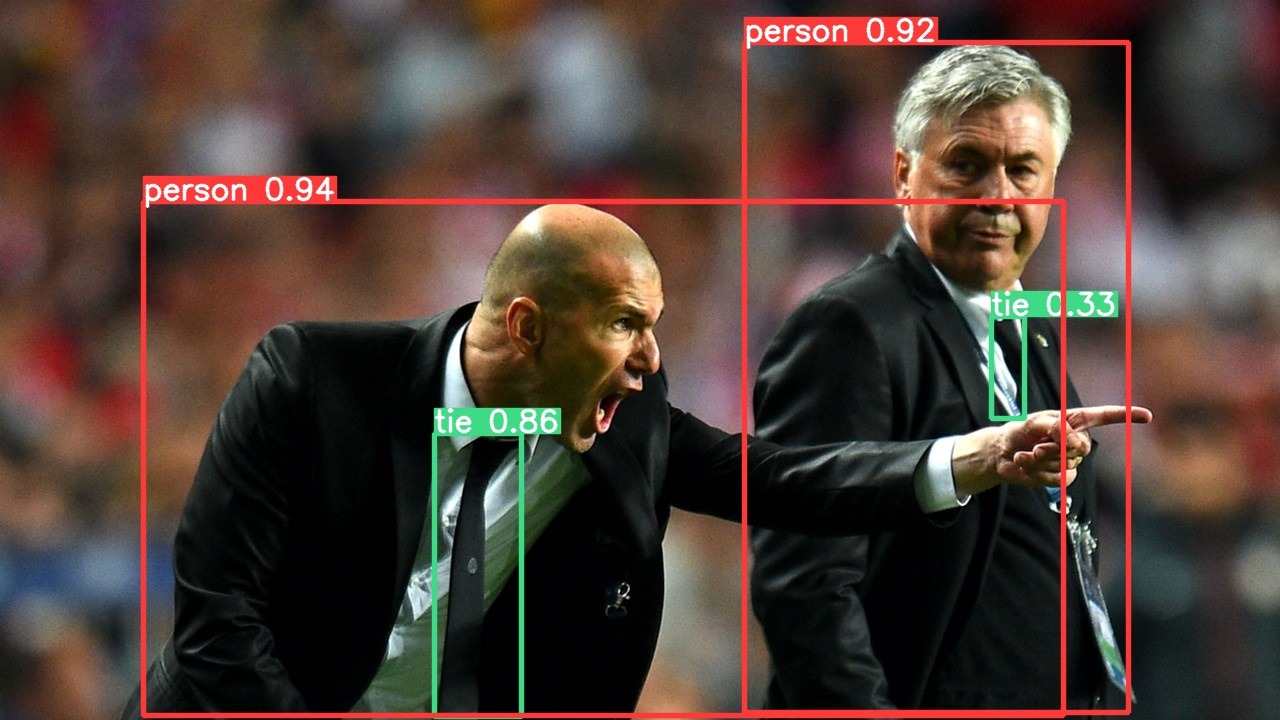

In [ ]:
from IPython.display import Image, clear_output 

Image(filename='yolov3/runs/detect/exp/zidane.jpg', width=600)

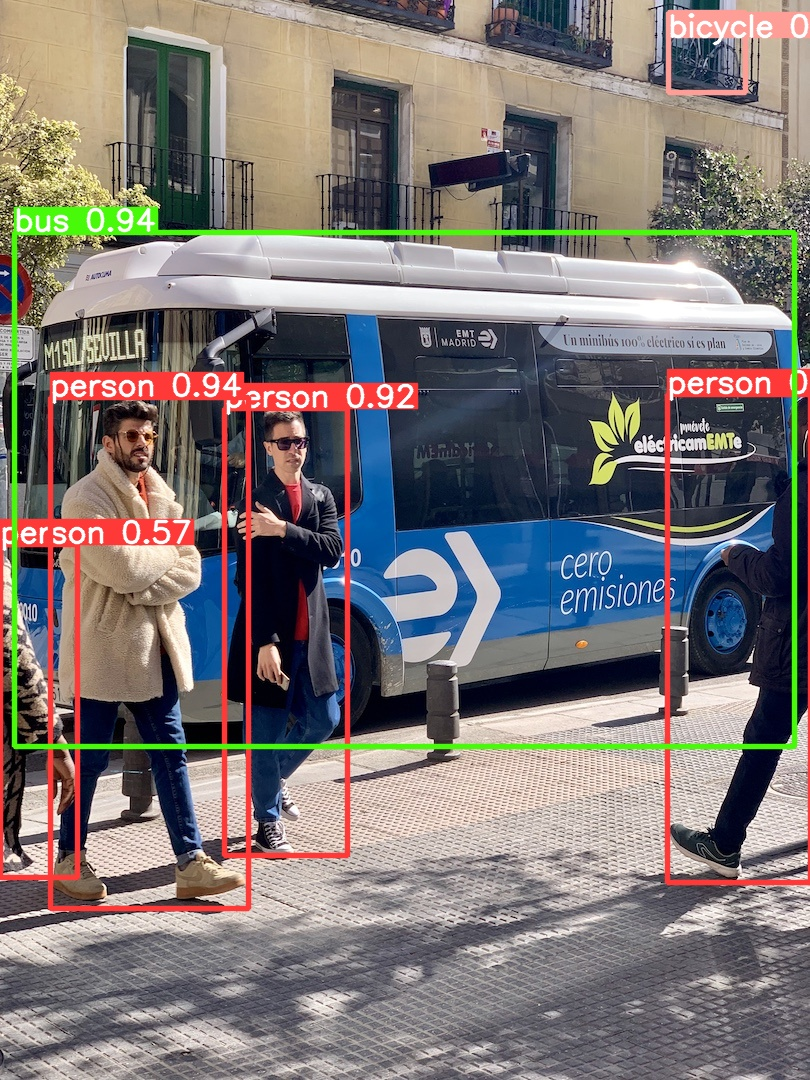

In [ ]:
Image(filename='yolov3/runs/detect/exp/bus.jpg', width=600)

### 다른 image로 Detect 수행

* 웹 상에 존재하는 아무런 이미지나 다운로드

In [ ]:
# 실행 디렉토리를 고정하고, 시각화시 bounding box line 두께를 조절. 
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source //content/drive/MyDrive/CDS2/img/test/bts.png  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1
                            # source image 변경, --project /content/data로 경로 변경 , --이름도 run_image # 두께 조정

detect: weights=['yolov3.pt'], source=//content/drive/MyDrive/CDS2/img/test/bts.png, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/CDS2/img/test/bts.png: 448x640 7 persons, 1 tie, 1 sports ball, Done. (0.052s)
Speed: 0.6ms pre-process, 52.4ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


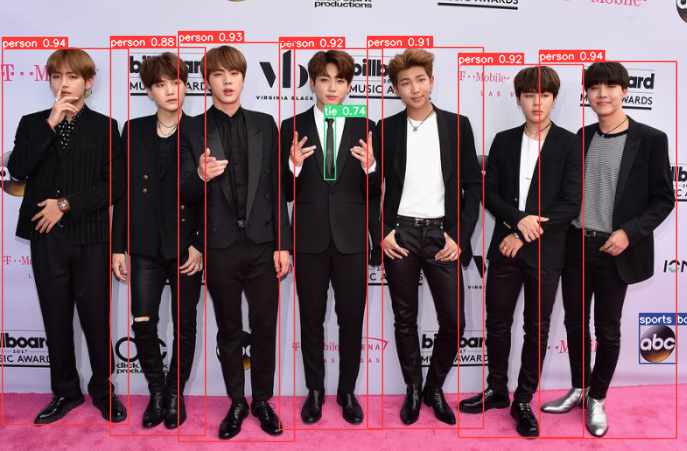

In [ ]:
Image(filename='/content/data/run_image/bts.png', width=600)

In [ ]:
# 실행 디렉토리를 고정하고, 시각화시 bounding box line 두께를 조절. 
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source //content/drive/MyDrive/CDS2/img/test/car.png  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1
                            # source image 변경, --project /content/data로 경로 변경 , --이름도 run_image # 두께 조정

detect: weights=['yolov3.pt'], source=//content/drive/MyDrive/CDS2/img/test/car.png, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/CDS2/img/test/car.png: 480x640 1 person, 6 cars, 1 truck, 2 traffic lights, Done. (0.055s)
Speed: 0.6ms pre-process, 55.2ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


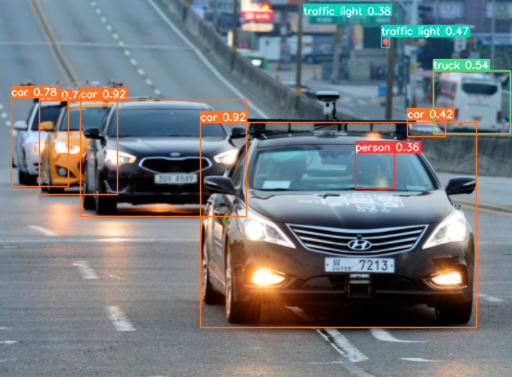

In [ ]:
Image(filename='/content/data/run_image/car.png', width=600)

* 반도체 공정 이미지 적용?

In [ ]:
# 실행 디렉토리를 고정하고, 시각화시 bounding box line 두께를 조절. 
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source //content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TEST/20_LSAC/10.jpg  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1
                            # source image 변경, --project /content/data로 경로 변경 , --이름도 run_image # 두께 조정

detect: weights=['yolov3.pt'], source=//content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TEST/20_LSAC/10.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TEST/20_LSAC/10.jpg: 640x640 Done. (0.066s)
Speed: 0.7ms pre-process, 66.1ms inference, 0.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


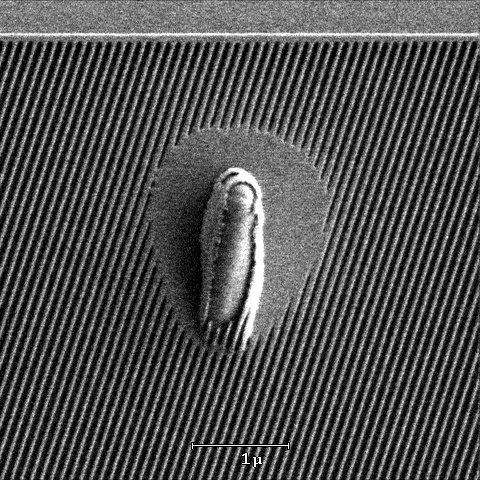

In [ ]:
Image(filename='/content/data/run_image/10.jpg', width=600)

In [17]:
 !cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source //content/news.PNG  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=//content/news.PNG, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/news.PNG: 448x640 10 persons, 1 tie, Done. (0.052s)
Speed: 0.4ms pre-process, 52.1ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


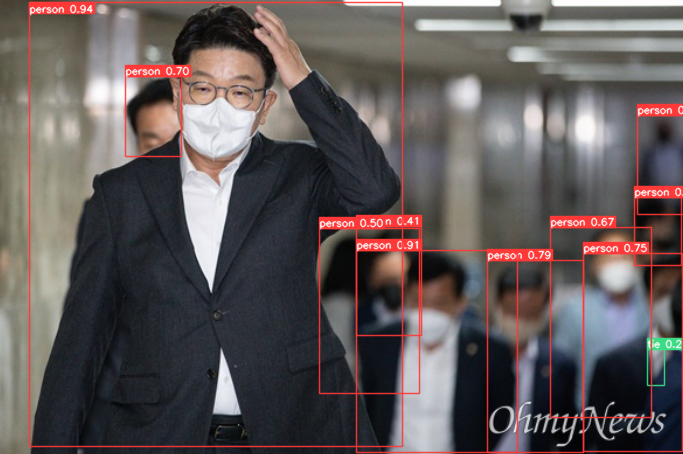

In [18]:
Image(filename='/content/data/run_image/news.PNG', width=600)

In [20]:
# 실행 디렉토리를 고정하고, 시각화시 bounding box line 두께를 조절. 
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source //content/1.PNG  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1
                            # source image 변경, --project /content/data로 경로 변경 , --이름도 run_image # 두께 조정

detect: weights=['yolov3.pt'], source=//content/1.PNG, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/1.PNG: 448x640 16 persons, 1 car, 19 chairs, Done. (0.053s)
Speed: 0.4ms pre-process, 53.4ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


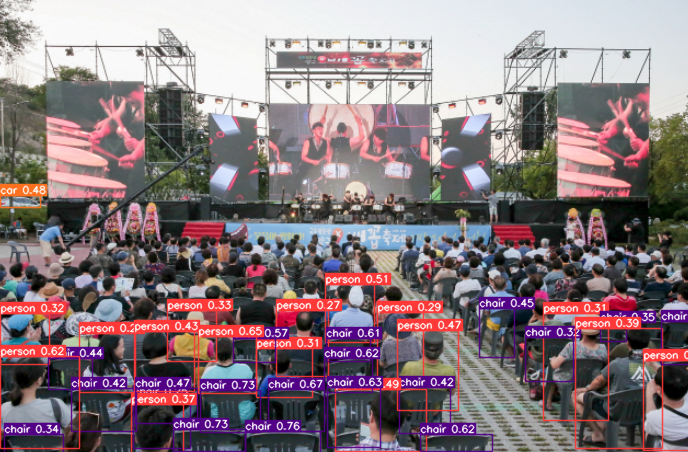

In [21]:
Image(filename='/content/data/run_image/1.PNG', width=600)

In [22]:
# 실행 디렉토리를 고정하고, 시각화시 bounding box line 두께를 조절. 
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source //content/2.PNG  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1
                            # source image 변경, --project /content/data로 경로 변경 , --이름도 run_image # 두께 조정

detect: weights=['yolov3.pt'], source=//content/2.PNG, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/2.PNG: 640x640 2 cars, 5 buss, 1 truck, Done. (0.063s)
Speed: 0.6ms pre-process, 62.7ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


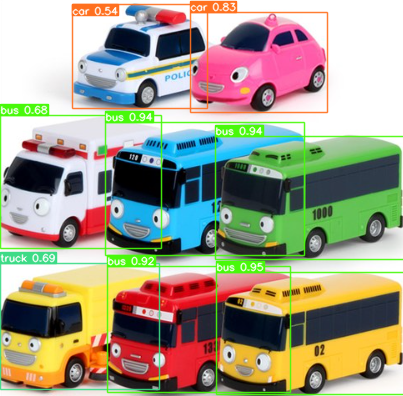

In [23]:
Image(filename='/content/data/run_image/2.PNG', width=600)